In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
btc = pd.read_csv('BTC-GBP.csv')
snp = pd.read_csv('^GSPC.csv')
#print(btc.head(5),snp.head(5))

In [3]:
import os
import datetime
#from pandas_datareader.data import web


#tickers = ['CMS','CSX','MSFT','JPM']
#start = datetime.datetime(2018, 10, 8)
#end = datetime.datetime(2019, 10, 15)
#btc = pd.DataFrame([wb('BTC', 'yahoo', start, end)].all()).T
#snp = pd.DataFrame([wb('GSPC', 'yahoo', start, end)].all()).T
#df.columns = tickers

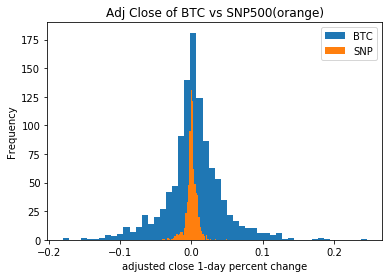

In [73]:
btc['Adj Close'].pct_change().plot.hist(bins=50, label='BTC')
snp['Adj Close'].pct_change().plot.hist(bins=50, label='SNP')
plt.xlabel('adjusted close 1-day percent change')
plt.title('Adj Close of BTC vs SNP500(orange)')
plt.legend()
plt.show()

In [5]:
btc.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1.095000e+03
mean,3752.013848,3885.497030,3598.798272,3760.372642,3760.372642,5.291898e+06
std,2784.683155,2908.647951,2619.011867,2788.230418,2788.230418,6.389460e+06
min,397.869995,437.820007,133.029999,397.869995,397.869995,1.039090e+05
25%,979.074982,1002.919983,960.709992,979.424988,979.424988,4.544205e+05
50%,3230.270020,3370.570068,3123.899902,3234.250000,3234.250000,3.911277e+06
75%,5487.200195,5717.410156,5224.415039,5504.270019,5504.270019,6.819843e+06
max,14943.419922,15339.589844,13908.769531,14943.419922,14943.419922,6.462075e+07


In [6]:
snp.describe()

,Open,High,Low,Close,Adj Close,Volume
count,754.000000,754.000000,754.000000,754.000000,754.000000,7.540000e+02
mean,2564.799496,2575.146312,2553.607917,2565.139561,2565.139561,3.538820e+09
std,245.593781,247.499549,243.469561,245.382394,245.382394,6.185275e+08
min,2083.790039,2099.070068,2083.790039,2085.179932,2085.179932,1.349780e+09
25%,2369.940064,2376.020019,2359.472473,2367.520081,2367.520081,3.200278e+09
50%,2612.854981,2634.979981,2593.065064,2611.460083,2611.460083,3.466495e+09
75%,2774.112427,2785.924927,2760.219971,2773.952515,2773.952515,3.779145e+09
max,2984.250000,2995.840088,2977.959961,2995.820068,2995.820068,7.609010e+09


In [7]:
btci = pd.DataFrame.merge(snp,btc,on='Date',how='left')
btci.head(10)

,Date,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y
0,2016-07-08,2106.969971,2131.709961,2106.969971,2129.899902,2129.899902,3607500000,516.609985,530.619995,494.519989,517.940002,517.940002,222201.0
1,2016-07-11,2131.719971,2143.159912,2131.719971,2137.159912,2137.159912,3253340000,510.160004,518.530029,497.790009,515.979980,515.979980,241061.0
2,2016-07-12,2139.500000,2155.399902,2139.500000,2152.139893,2152.139893,4097820000,515.979980,523.099976,505.040009,517.039978,517.039978,258885.0
3,2016-07-13,2153.810059,2156.449951,2146.209961,2152.429932,2152.429932,3502320000,517.039978,517.619995,499.720001,512.070007,512.070007,315095.0
4,2016-07-14,2157.879883,2168.989990,2157.879883,2163.750000,2163.750000,3465610000,512.070007,515.989990,496.820007,515.229980,515.229980,241396.0
5,2016-07-15,2165.129883,2169.050049,2155.790039,2161.739990,2161.739990,3122600000,515.229980,517.440002,504.049988,511.720001,511.720001,130636.0
6,2016-07-18,2162.040039,2168.350098,2159.629883,2166.889893,2166.889893,3009310000,517.419983,521.520020,508.899994,516.570007,516.570007,240883.0
7,2016-07-19,2163.790039,2164.629883,2159.010010,2163.780029,2163.780029,2968340000,516.570007,518.940002,509.959991,514.619995,514.619995,278460.0
8,2016-07-20,2166.100098,2175.629883,2164.889893,2173.020020,2173.020020,3211860000,514.619995,519.619995,505.070007,512.559998,512.559998,233502.0
9,2016-07-21,2172.909912,2174.560059,2159.750000,2165.169922,2165.169922,3438900000,512.559998,514.989990,496.940002,504.820007,504.820007,294566.0


In [8]:
import talib

In [9]:
b = btci.iloc[:,11].values.astype(float)
t = btci.iloc[:,8].values.astype(float)
c = btci.iloc[:,9].values.astype(float)
bi = btci.iloc[:,12].values.astype(float)
bx = btci.iloc[:,5].values.astype(float)
tx = btci.iloc[:,2].values.astype(float)
cx = btci.iloc[:,3].values.astype(float)
bix = btci.iloc[:,6].values.astype(float)

In [10]:
feature_names = []  # a list of the feature names for 

# Create moving averages and rsi for timeperiods of 14, 30, 50, and 200
for n in [14,30,50,200]:

    # Create the moving average indicator and divide by Adj_Close
    #btci['ma' + str(n)] = talib.SMA(b,timeperiod=n) / b
    
    # Create the RSI indicator
    btci['rsi' + str(n)] = talib.RSI(b, timeperiod=n)
    
    # Create the CCI indicator
    btci['cci' + str(n)] = talib.CCI(t,c,b, timeperiod=n)
    
    # Create the MFI indicator
    btci['mfi' + str(n)] = talib.MFI(t , c, b, bi, timeperiod=n)
    
    # Create the moving average indicator and divide by Adj_Close
    #btci['max' + str(n)] = talib.SMA(bx,timeperiod=n) / bx
    
    # Create the RSI indicator
    btci['rsix' + str(n)] = talib.RSI(bx, timeperiod=n)
    
    # Create the CCI indicator
    btci['ccix' + str(n)] = talib.CCI(tx,cx,bx, timeperiod=n)
    
    # Create the MFI indicator
    btci['mfix' + str(n)] = talib.MFI(tx , cx, bx, bix, timeperiod=n)
    
    # Add rsi and moving average to the feature name list
    feature_names = feature_names + ["""'ma' + str(n),""" 'rsi' + str(n), 'cci' + str(n), 'mfi' + str(n),"""'max' + str(n),""" 'rsix' + str(n)
                                     , 'ccix' + str(n), 'mfix' + str(n)]

print(feature_names)

["'ma' + str(n),rsi14", 'cci14', 'mfi14', "'max' + str(n),rsix14", 'ccix14', 'mfix14', "'ma' + str(n),rsi30", 'cci30', 'mfi30', "'max' + str(n),rsix30", 'ccix30', 'mfix30', "'ma' + str(n),rsi50", 'cci50', 'mfi50', "'max' + str(n),rsix50", 'ccix50', 'mfix50', "'ma' + str(n),rsi200", 'cci200', 'mfi200', "'max' + str(n),rsix200", 'ccix200', 'mfix200']


In [11]:
btci['5_day_fut_pct'] = pd.DataFrame(btci.iloc[:,-1].values).shift(-5).pct_change(5)


In [12]:
btci['5_day_fut_close'] = pd.DataFrame(btci.iloc[:,11].values).shift(-5)

In [13]:
btci = btci.dropna(axis=0).drop('Date',axis=1)
print(btci.head())
print(btci.describe())

          Open_x       High_x        Low_x      Close_x  Adj Close_x  \
200  2381.510010  2392.479980  2381.149902  2388.610107  2388.610107   
201  2388.979980  2398.159912  2386.780029  2387.449951  2387.449951   
202  2389.699951  2392.100098  2382.679932  2388.770020  2388.770020   
203  2393.679932  2393.679932  2382.360107  2384.199951  2384.199951   
204  2388.500000  2394.489990  2384.830078  2388.330078  2388.330078   

       Volume_x       Open_y       High_y        Low_y      Close_y  \
200  3995240000  1000.140015  1030.349976   992.030029  1012.520020   
201  4105920000  1012.520020  1051.770020   991.650024  1043.599976   
202  4098460000  1043.599976  1076.939941  1001.119995  1055.410034   
203  3718270000  1055.410034  1061.500000  1032.280029  1051.109985   
204  3199240000  1099.229980  1163.260010  1100.660034  1136.780029   

          ...             ccix50     mfix50     rsi200      cci200     mfi200  \
200       ...         154.469125  52.085940  57.520986  141

In [14]:
corr = btci.corr()
print(corr)

                   Open_x    High_x     Low_x   Close_x  Adj Close_x  \
Open_x           1.000000  0.997209  0.994862  0.992469     0.992469   
High_x           0.997209  1.000000  0.992816  0.995329     0.995329   
Low_x            0.994862  0.992816  1.000000  0.996317     0.996317   
Close_x          0.992469  0.995329  0.996317  1.000000     1.000000   
Adj Close_x      0.992469  0.995329  0.996317  1.000000     1.000000   
Volume_x        -0.026871 -0.006156 -0.069927 -0.044640    -0.044640   
Open_y           0.452539  0.453613  0.453374  0.450940     0.450940   
High_y           0.437369  0.438614  0.438345  0.436186     0.436186   
Low_y            0.470623  0.472093  0.471940  0.469920     0.469920   
Close_y          0.447699  0.449273  0.449310  0.447741     0.447741   
Adj Close_y      0.447699  0.449273  0.449310  0.447741     0.447741   
Volume_y         0.185622  0.184612  0.185205  0.181891     0.181891   
rsi14           -0.148093 -0.163841 -0.122247 -0.139784    -0.13

In [15]:
import seaborn as sns

<function matplotlib.pyplot.show(*args, **kw)>

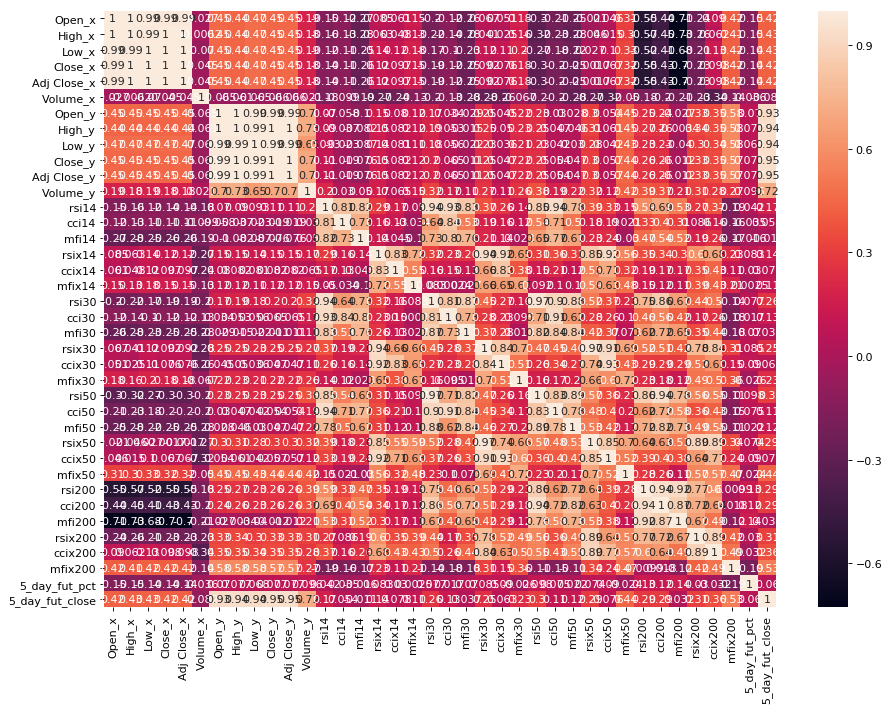

In [16]:

plt.figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(corr, annot=True)
plt.yticks(rotation=0); plt.xticks(rotation=90)  # fix ticklabel directions
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show  # show the plot

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale, Normalizer, StandardScaler

In [18]:
#btc_sc = scale(btci.iloc[:,13:36].values)
sc= StandardScaler()
X_train = sc.fit_transform(btci.drop(labels='Volume_x',axis=1).iloc[0:419,0:11].values)
X_test = sc.fit_transform(btci.drop(labels='Volume_x',axis=1).iloc[419:718,0:11].values)
y_train = btci.iloc[0:419,-1].values
y_test = btci.iloc[419:718,-1].values

In [19]:
lm_model = LinearRegression()

In [20]:
lm_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
pred = lm_model.predict(X_test)

In [22]:
from sklearn.metrics import classification_report

In [23]:
print(lm_model.score(X_train,y_train))

0.9100533394292325


In [24]:
print(lm_model.score(X_test,y_test))

0.7432193324991243


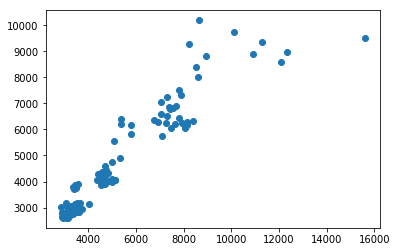

In [25]:
plt.plot(pred,y_test,'o')
plt.show()

In [26]:
from sklearn.svm import SVR

In [27]:
sv_model = SVR()

In [28]:
sv_model.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [29]:
predsv = sv_model.predict(X_test)

In [30]:
print(sv_model.score(X_test,y_test))

-0.00869731963119591


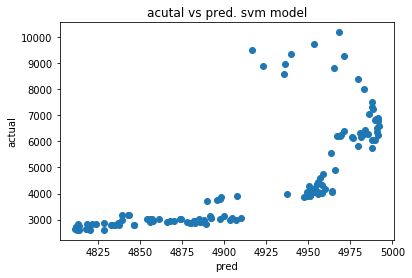

In [31]:
plt.plot(predsv,y_test, 'o')
plt.title('acutal vs pred. svm model')
plt.xlabel('pred')
plt.ylabel('actual')
plt.show()

In [32]:
from sklearn.neighbors import KNeighborsRegressor

In [33]:
kn_model = KNeighborsRegressor()

In [34]:
kn_model.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [35]:
predkn = kn_model.predict(X_test)

In [36]:
predkntr = kn_model.predict(X_train)

In [37]:
print(kn_model.score(X_test,y_test))

0.6997165485717237


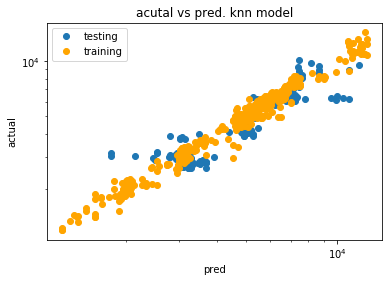

In [38]:
plt.plot(predkn,y_test, 'o',label='testing')
plt.plot(predkntr,y_train, 'o',c='orange',label='training')
plt.yscale('log')
plt.xscale('log')
plt.title('acutal vs pred. knn model')
plt.xlabel('pred')
plt.ylabel('actual')
plt.legend()
plt.show()

In [39]:
import keras
#from keras.layers import Dense
#from keras.models import Sequential
#Building the RNN LSTM model
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.
C:\Users\Aimazin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Aimazin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Aimazin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Aimazin\Anaconda3\lib\site-packages\tensorflow\python\framework\d

In [40]:

mu, sigma = 0, 0.1 
# creating a noise with the same dimension as the dataset (2,2) 
noise = np.random.normal(mu, sigma, [419,11])
X_traini=X_train +noise
# Creating a data structure with 60 timesteps and 1 output
X_trainx = []
y_trainx = []
for i in range(60, 419):
    X_trainx.append(X_train[i-60:i, 0])
    y_trainx.append(y_train[i])
X_trainx, y_trainx = np.array(X_trainx), np.array(y_trainx)

# Reshaping
X_trainx = np.reshape(X_trainx, (X_trainx.shape[0], X_trainx.shape[1], 1))

In [41]:
# Initialising the RNN
regressor = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(Dense(256, activation='relu', input_shape=[11]))
#,LSTM(units = 50, return_sequences = True, input_shape = (X_trainx.shape[1], 1)))
              
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(Dense(128, activation='relu'))#,LSTM(units = 50, return_sequences = True))
"""
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))"""

# Adding the output layer
regressor.add(Dense(units = 1))
# Compiling the RNN
regressor.compile(optimizer = 'RMSprop', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
#regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 2000

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

regressor.fit(
  X_traini, y_train,
  epochs=EPOCHS, validation_split = 0.3, verbose=0, batch_size=32,
  callbacks=[early_stop, PrintDot()])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.

....................................................................................................
.........................................................

In [42]:
# Calculate predictions: predictions
prednn = regressor.predict(X_test)


In [43]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [44]:

#tnn[0:4]
print(mean_absolute_error(y_test,prednn))
print(np.sqrt(mean_squared_error(y_test,prednn)))

631.4715264267201
919.5686642436287


No handles with labels found to put in legend.


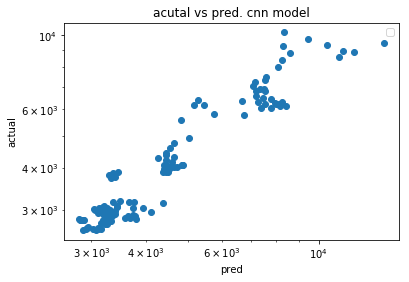

In [45]:
plt.plot(prednn,y_test,'o')
#plt.plot(prednntr,y_train, 'o',c='orange',label='training')
plt.yscale('log')
plt.xscale('log')
plt.title('acutal vs pred. cnn model')
plt.xlabel('pred')
plt.ylabel('actual')
plt.legend()
plt.show()

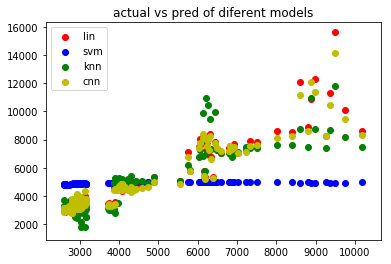

In [46]:
# Create a scatter plot with train and test actual vs predictions
plt.scatter(y_test, pred, label='lin',c='r')
plt.scatter(y_test,predsv,label='svm',c='b')
plt.scatter(y_test, predkn, label='knn',c='g')
plt.scatter(y_test,prednn,label='cnn',c='y')
#plt.yscale('log')
#plt.xscale('log')
plt.title('actual vs pred of diferent models')
plt.legend()
plt.show()


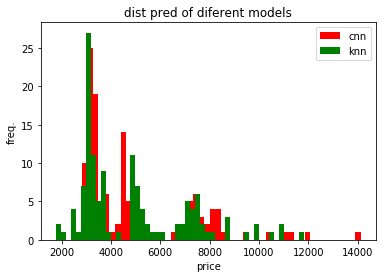

In [47]:
# Create a histogram plot with train and test actual vs predictions
plt.hist( prednn,bins=50, label='cnn',color='r')
#plt.hist(predsv,bins=50, label='svm',color='b')
plt.hist( predkn,bins=50, label='knn',color='g')
#plt.hist(prednn,label='nn',color='y')
#plt.yscale('log')
#plt.xscale('log')
plt.title('dist pred of diferent models')
plt.xlabel('price')
plt.ylabel('freq.')
plt.legend()
plt.show()

In [48]:
import scipy.optimize as spo

In [49]:
datai = pd.DataFrame([y_test[:].astype(float),predkn[:].astype(float)])
datai.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,2947.110107,3145.570068,3026.300049,3038.320068,3156.360107,3172.379883,3157.199951,2890.419922,2872.290039,2878.899902,...,8412.570313,9267.309570,10189.009766,8814.759766,9738.000000,9361.990234,8600.599609,9495.919922,8889.589844,8983.610352
1,2445.090015,1783.137988,1783.137988,2139.397998,2520.230029,2520.230029,3260.570044,2490.048022,3599.416064,3604.542041,...,7618.816113,7406.798144,7451.256152,7451.256152,8196.096191,8667.796094,8720.152148,11822.475977,10946.083985,8720.152148


In [50]:
data=np.asarray([predkn[:].astype(int),y_test[:].astype(int)])
data= pd.DataFrame(data)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,2445,1783,1783,2139,2520,2520,3260,2490,3599,3604,...,7618,7406,7451,7451,8196,8667,8720,11822,10946,8720
1,2947,3145,3026,3038,3156,3172,3157,2890,2872,2878,...,8412,9267,10189,8814,9738,9361,8600,9495,8889,8983


In [51]:
datan=np.asarray([prednn[:,0].astype(int),y_test[:].astype(int)])
datan= pd.DataFrame(datan)
datan.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,4111,4387,3934,3730,3667,3496,3763,3735,3641,3775,...,8222,8291,8332,8600,9440,10448,11132,14117,12075,11401
1,2947,3145,3026,3038,3156,3172,3157,2890,2872,2878,...,8412,9267,10189,8814,9738,9361,8600,9495,8889,8983


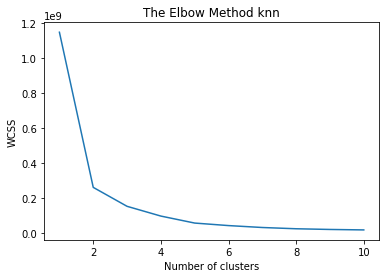

In [52]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data.transpose())
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method knn')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

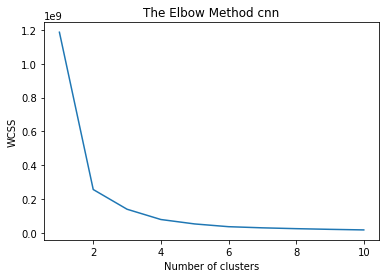

In [53]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(datan.transpose())
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method cnn')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [54]:

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data.transpose())

In [55]:
data = data.transpose()
data=pd.DataFrame(data)
data.head()
y_kmeans=pd.DataFrame(y_kmeans)
y_kmeans.head()
data['km']=y_kmeans

In [56]:

# Fitting K-Means to the dataset
kmeansn = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeansn = kmeansn.fit_predict(datan.transpose())

In [57]:
datan = datan.transpose()
datan=pd.DataFrame(datan)
datan.head()
y_kmeansn=pd.DataFrame(y_kmeansn)
y_kmeansn.head()
datan['km']=y_kmeansn


In [58]:
lin=pd.DataFrame(kmeans.cluster_centers_[:,:]).drop(index=1)
linn=pd.DataFrame(kmeansn.cluster_centers_[:,:]).drop(index=1)


In [59]:
print(lin.iloc[0,1:3].values)

[2973.44117647]


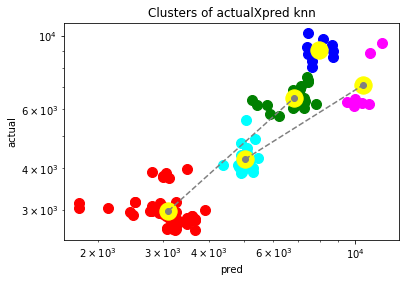

In [60]:

# Visualising the clusters
plt.scatter(data[data['km'] == 0][0], data[data['km'] == 0][1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data[data['km'] == 1][0], data[data['km'] == 1][1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data[data['km'] == 2][0], data[data['km'] == 2][1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data[data['km'] == 3][0], data[data['km'] == 3][1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(data[data['km'] == 4][0], data[data['km'] == 4][1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.plot(lin.iloc[0:2,0].values,lin.iloc[0:2,1].values,c='grey',marker='o', linestyle='dashed')
plt.plot(lin.iloc[2:4,0].values,lin.iloc[2:4,1].values,c='grey',marker='o', linestyle='dashed')
plt.yscale('log')
plt.xscale('log')
plt.title('Clusters of actualXpred knn')
plt.xlabel('pred')
plt.ylabel('actual')
#plt.legend()
plt.show()

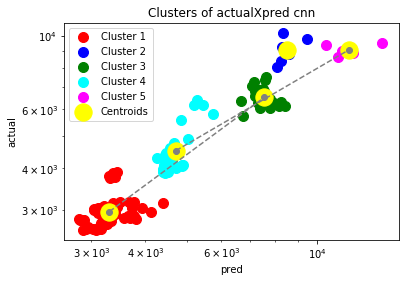

In [61]:

# Visualising the clusters
plt.scatter(datan[datan['km'] == 0][0], datan[datan['km'] == 0][1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(datan[datan['km'] == 1][0], datan[datan['km'] == 1][1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(datan[datan['km'] == 2][0], datan[datan['km'] == 2][1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(datan[datan['km'] == 3][0], datan[datan['km'] == 3][1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(datan[datan['km'] == 4][0], datan[datan['km'] == 4][1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeansn.cluster_centers_[:, 0], kmeansn.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.plot(linn.iloc[0:2,0].values,linn.iloc[0:2,1].values,c='grey',marker='o', linestyle='dashed')
plt.plot(linn.iloc[2:4,0].values,linn.iloc[2:4,1].values,c='grey',marker='o', linestyle='dashed')
plt.yscale('log')
plt.xscale('log')
plt.title('Clusters of actualXpred cnn')
plt.xlabel('pred')
plt.ylabel('actual')
plt.legend()
plt.show()

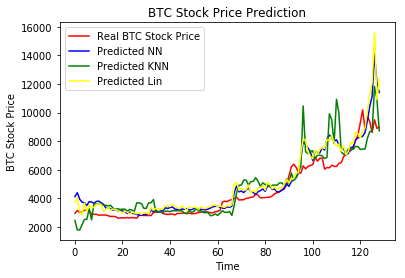

In [62]:
# Visualising the results
plt.plot(y_test, color = 'red', label = 'Real BTC Stock Price')
plt.plot(prednn, color = 'blue', label = 'Predicted NN')
plt.plot(predkn, color = 'green', label = 'Predicted KNN')
plt.plot(pred, color = 'yellow', label = 'Predicted Lin')
plt.title('BTC Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('BTC Stock Price')
plt.legend()
plt.show()

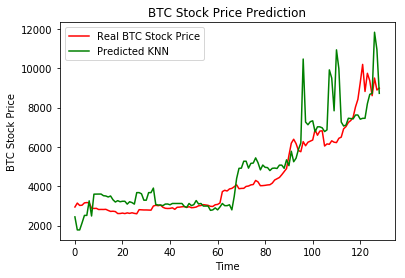

In [63]:
# Visualising the results
plt.plot(y_test, color = 'red', label = 'Real BTC Stock Price')
#plt.plot(prednn, color = 'blue', label = 'Predicted NN')
plt.plot(predkn, color = 'green', label = 'Predicted KNN')
#plt.plot(pred, color = 'yellow', label = 'Predicted Lin')
plt.title('BTC Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('BTC Stock Price')
plt.legend()
plt.show()

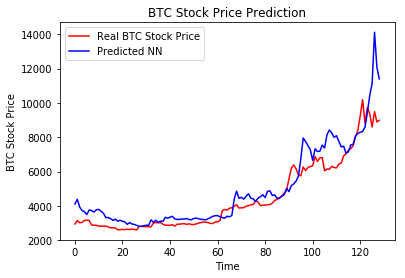

In [64]:
# Visualising the results
plt.plot(y_test, color = 'red', label = 'Real BTC Stock Price')
plt.plot(prednn, color = 'blue', label = 'Predicted NN')
#plt.plot(predkn, color = 'green', label = 'Predicted KNN')
#plt.plot(pred, color = 'yellow', label = 'Predicted Lin')
plt.title('BTC Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('BTC Stock Price')
plt.legend()
plt.show()

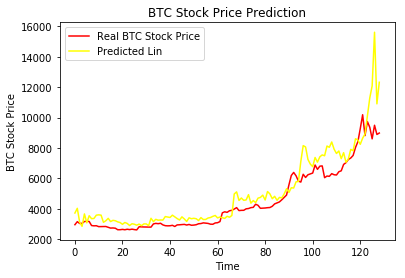

In [65]:
# Visualising the results
plt.plot(y_test, color = 'red', label = 'Real BTC Stock Price')
#plt.plot(prednn, color = 'blue', label = 'Predicted NN')
#plt.plot(predkn, color = 'green', label = 'Predicted KNN')
plt.plot(pred, color = 'yellow', label = 'Predicted Lin')
plt.title('BTC Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('BTC Stock Price')
plt.legend()
plt.show()

In [66]:
xprednn=np.asarray(regressor.predict(X_train))
X=pd.DataFrame(xprednn).rename(columns={0:'red'})
t=(pd.DataFrame(btci.drop(labels='Volume_x',axis=1).iloc[0:419,0:11].values))
X.head()

,red
0,1627.244141
1,1621.973999
2,1627.040894
3,1626.032837
4,1631.733521


In [67]:
xt=X.join(t)
X_trainsup = sc.fit_transform(xt)
r=pd.DataFrame(btci.drop(labels='Volume_x',axis=1).iloc[419:718,0:11].values)
Xt=pd.DataFrame(prednn).rename(columns={0:'red'})
xtr=Xt.join(r)
X_testsup = sc.fit_transform(xtr)
#y_train = btci.iloc[0:419,-1].values
#y_test = btci.iloc[419:718,-1].values

C:\Users\Aimazin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype float32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aimazin\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype float32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Aimazin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype float32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aimazin\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype float32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [68]:
btci.columns
h=btci[['5_day_fut_close','Open_x', 'High_x', 'Low_x', 'Close_x', 'Adj Close_x',
       'Open_y', 'High_y', 'Low_y', 'Close_y', 'Adj Close_y', 'Volume_y' ]]
h=h.rename(columns={'Adj Close_x':'x','Adj Close_y':'y','5_day_fut_close':'suc'})
#hxy.columns
h.suc=h.suc.astype(int)

In [69]:
from statsmodels.tools import eval_measures
import statsmodels.api as sm
import statsmodels.formula.api as smf

def get_best_model(train, test):
    # Step 1: specify the form of the model
    model_formula = " suc ~  \
    Open_x +  High_x + Low_x +  Close_x + x + Open_y +\
    High_y + Low_y + Close_y + y + Volume_y"
    
    grid =( 10** np.arange(0, 30, dtype=np.float64)).astype(int)
                    
    best_alpha = []
    best_score = 1000
        
    # Step 2: Find the best hyper parameter, alpha
    for alpha in grid:
        model = smf.glm(formula=model_formula,
                        data=train,
                        family=sm.families.Poisson())#Gaussian())#NegativeBinomial(alpha=alpha))

        results = model.fit()
        predictions = results.predict(test).astype(int)
        score = eval_measures.meanabs(predictions, test.suc)#.astype(int))

        if score < best_score:
            best_alpha = alpha
            best_score = score

    print('best alpha = ', best_alpha)
    print('best score = ', best_score)
            
    # Step 3: refit on entire dataset
    full_dataset = pd.concat([train, test])
    model = smf.glm(formula=model_formula,
                    data=full_dataset,
                    family=sm.families.Poisson())#Gaussian())#NegativeBinomial(alpha=best_alpha))

    fitted_model = model.fit()
    return fitted_model 

In [70]:
sj_train_subtrain = h.head(419)
sj_train_subtest = h.tail(h.shape[0] - 419)
hr = h.head(300)
ht = h.tail(h.shape[0] - 300)
g = pd.concat([hr,ht])
g.head()

best_model = get_best_model(sj_train_subtrain, sj_train_subtest)

best alpha =  1
best score =  727.8914728682171


In [71]:
predstat=best_model.predict(sj_train_subtest.reset_index())

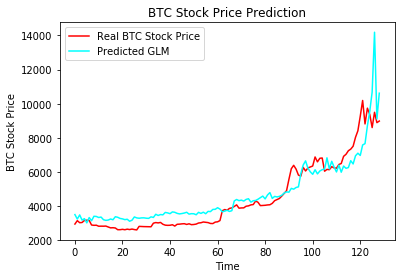

In [72]:
# Visualising the results
plt.plot(y_test, color = 'red', label = 'Real BTC Stock Price')
#plt.plot(prednn, color = 'blue', label = 'Predicted NN')
#plt.plot(predkn, color = 'green', label = 'Predicted KNN')
plt.plot(predstat, color = 'cyan', label = 'Predicted GLM')
plt.title('BTC Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('BTC Stock Price')
plt.legend()
plt.show()